In [1]:
import os
import sys
import warnings
import platform

# Basic Data Analysis Tools
import numpy as np
import pandas as pd
from scipy import stats

# Exploratory Data Analysis (EDA)
import matplotlib as mpl
from matplotlib import rc
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Data Preprocessing and Cleansing
from sklearn.preprocessing import LabelEncoder
from scipy.integrate import quad

# Feature Engineering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100


In [3]:
os.chdir(r'G:\공유 드라이브\Boad ADV Stock\화장품')

In [4]:
company= '한국화장품'
data = pd.read_csv('data_200_{}.csv'.format(company), encoding='euc-kr', engine='python', index_col=0)

In [5]:
# data = pd.read_csv('data_씨아이에스_20.csv', thousands=',' ,index_col=0, encoding='utf-16')
data.head()

,Date,asset(1000),debt(1000),sales(1000),adjusted_price,volumne(mean_5d)(week),volumne(week),profit(1000),term_profit(1000),gross_margin(1000),adjusted_BPS,adjusted_EPS,last_kospi_vol,open_kospi_vol,high_kospi_vol,low_kospi_vol,%change_kospi_vol,last_korean_bond,open_korean_bond,high_korean_bond,low_korean_bond,%change_korean_bond,last_usd_krw,open_usd_krw,high_usd_krw,low_usd_krw,%change_usd_krw,G.TOTAL,Foreign Visitors,Overseas Korean,ASIA,Japan,Taiwan,"Hong Kong, China(including Hong Kong ID.)",Thailand,Philippines,Vietnam,China P. R.,(China),(China-Korean),kospi,kosdaq,last_cny_krw,open_cny_krw,high_cny_krw,low_cny_krw,%change_cny_krw,rsi_14,macd,cci,adx,stoch_slowk,stoch_slowd,willr,momentum,roc,ema20,adosc,obv,event1,event2,event3,event4,event5,event6,event7,event8,event9,event10,event11,event12,event13,event14,event15,event16,profit_rate,rate_rolling_3,rate_rolling_5,rate_rolling_10,rate_rolling_30,rate_rolling_120,rate_rolling_150
0,2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.840,4.840,4.840,4.840,-1.43,1120.50,1124.70,1125.4,1115.40,-0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,540.40,1694.12,1120.50,1124.70,1125.4,1115.40,-0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033291,0.043504,-0.124855,-0.119890,-0.196916,0.061998,-0.053666,-0.108402,0.261804,0.051315,-0.258031,-0.042846,-0.199007,-0.104931,-0.199364,-0.204308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.860,4.860,4.860,4.860,0.41,1120.75,1119.70,1127.3,1117.30,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,538.11,1698.64,1120.75,1119.70,1127.3,1117.30,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.027914,-0.007826,-0.179177,-0.156146,-0.212439,-0.073891,-0.144388,-0.162723,0.193392,-0.037016,-0.310264,-0.102571,-0.239889,-0.151257,-0.270027,-0.231637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.820,4.820,4.820,4.820,-0.82,1123.00,1120.75,1130.6,1118.80,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,534.46,1671.41,1123.00,1120.75,1130.6,1118.80,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.069575,0.095009,-0.095350,-0.004076,-0.142616,0.119064,-0.018598,-0.036894,0.281866,0.079148,-0.211487,0.028184,-0.141443,-0.042114,-0.182737,-0.112766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.775,4.775,4.775,4.775,-0.93,1123.00,1122.50,1123.9,1118.40,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,542.33,1685.77,1123.00,1122.50,1123.9,1118.40,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201723,0.213559,0.042572,0.069579,-0.035080,0.218252,0.090860,0.070117,0.394639,0.184853,-0.075081,0.127361,-0.021977,0.065252,-0.045681,-0.007413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.775,4.775,4.775,4.775,0.00,1123.50,1123.00,1125.3,1120.86,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549.97,1701.80,1123.50,1123.00,1125.3,1120.86,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.089114,0.072665,-0.070127,-0.169503,-0.102870,-0.026320,-0.005249,-0.066595,0.341046,0.068563,-0.214670,-0.013746,-0.175129,-0.041270,-0.121564,-0.142835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.set_index('Date', inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2461 entries, 2010-01-11 to 2019-12-30
Data columns (total 81 columns):
asset(1000)                                  1908 non-null float64
debt(1000)                                   1908 non-null float64
sales(1000)                                  2095 non-null float64
adjusted_price                               2364 non-null float64
volumne(mean_5d)(week)                       2364 non-null float64
volumne(week)                                2364 non-null float64
profit(1000)                                 2095 non-null float64
term_profit(1000)                            2095 non-null float64
gross_margin(1000)                           2095 non-null float64
adjusted_BPS                                 1908 non-null float64
adjusted_EPS                                 2095 non-null float64
last_kospi_vol                               1570 non-null float64
open_kospi_vol                               1570 non-null float64
high_kospi_v

In [8]:
null_data = data.isnull().sum() / len(data) * 100
null_data

asset(1000)                                  22.470540
debt(1000)                                   22.470540
sales(1000)                                  14.872003
adjusted_price                                3.941487
volumne(mean_5d)(week)                        3.941487
volumne(week)                                 3.941487
profit(1000)                                 14.872003
term_profit(1000)                            14.872003
gross_margin(1000)                           14.872003
adjusted_BPS                                 22.470540
adjusted_EPS                                 14.872003
last_kospi_vol                               36.204795
open_kospi_vol                               36.204795
high_kospi_vol                               36.204795
low_kospi_vol                                36.204795
%change_kospi_vol                            36.204795
last_korean_bond                              0.000000
open_korean_bond                              0.000000
high_korea

In [9]:
# data.ASIA.notnull()

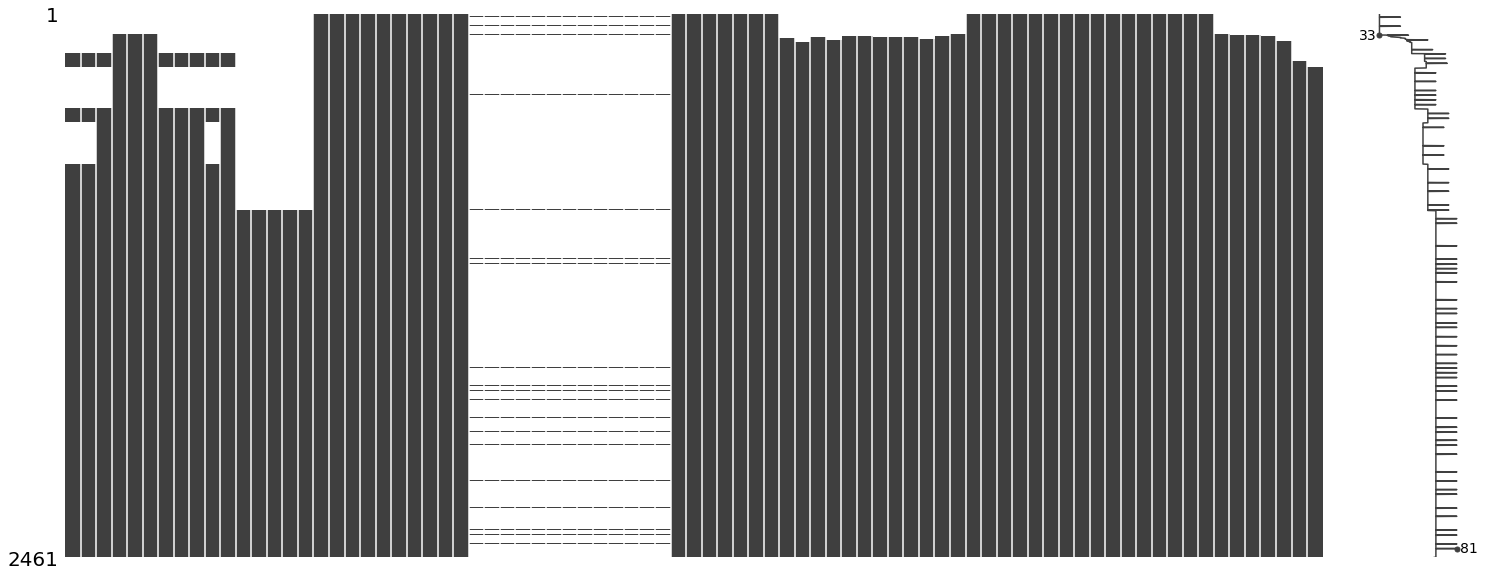

In [10]:
msno.matrix(data)
plt.show()

In [11]:
data.adjusted_price[~data.adjusted_price.isnull()]

Date
2010-06-01     3435.0
2010-06-03     3950.0
2010-06-04     4540.0
2010-06-07     5220.0
2010-06-08     6000.0
2010-06-09     6900.0
2010-06-10     6860.0
2010-06-11     5840.0
2010-06-14     5300.0
2010-06-15     6090.0
2010-06-16     5180.0
2010-06-17     4890.0
2010-06-18     4590.0
2010-06-21     4680.0
2010-06-22     4260.0
2010-06-23     4275.0
2010-06-24     4450.0
2010-06-25     4270.0
2010-06-28     4210.0
2010-06-29     4000.0
2010-06-30     3830.0
2010-07-01     4400.0
2010-07-02     4000.0
2010-07-05     3880.0
2010-07-06     3780.0
2010-07-07     3860.0
2010-07-08     3835.0
2010-07-09     3865.0
2010-07-12     4230.0
2010-07-13     4295.0
2010-07-14     4170.0
2010-07-15     4005.0
2010-07-16     4075.0
2010-07-19     4070.0
2010-07-20     4200.0
2010-07-21     4105.0
2010-07-22     3955.0
2010-07-23     3895.0
2010-07-26     3890.0
2010-07-27     3900.0
2010-07-28     4085.0
2010-07-29     4205.0
2010-07-30     4020.0
2010-08-02     3995.0
2010-08-03     3965.0
2010-

In [12]:
data = data['2015-09-01':]

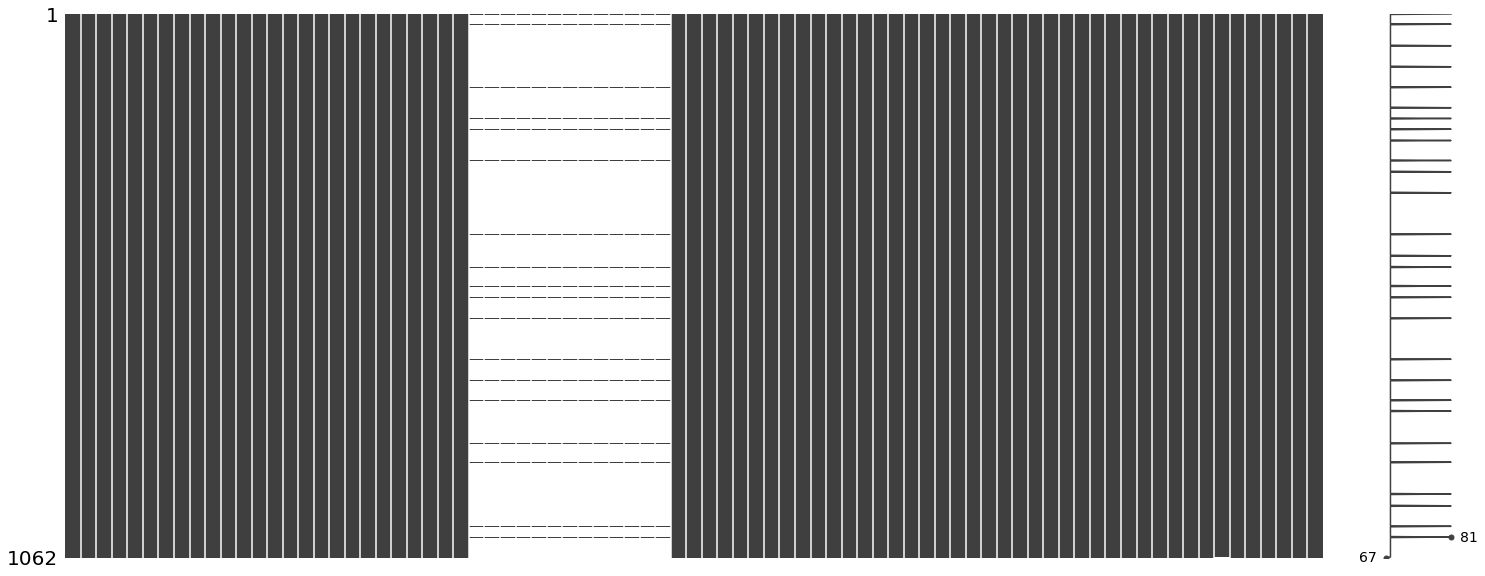

In [13]:
msno.matrix(data)
plt.show()

In [14]:
null_data = data.isnull().sum() / len(data) * 100
null_data

asset(1000)                                   0.000000
debt(1000)                                    0.000000
sales(1000)                                   0.000000
adjusted_price                                0.000000
volumne(mean_5d)(week)                        0.000000
volumne(week)                                 0.000000
profit(1000)                                  0.000000
term_profit(1000)                             0.000000
gross_margin(1000)                            0.000000
adjusted_BPS                                  0.000000
adjusted_EPS                                  0.000000
last_kospi_vol                                0.000000
open_kospi_vol                                0.000000
high_kospi_vol                                0.000000
low_kospi_vol                                 0.000000
%change_kospi_vol                             0.000000
last_korean_bond                              0.000000
open_korean_bond                              0.000000
high_korea

In [15]:
# data.drop(['price_cobalt_rotterdam','change_cobalt_rotterdam','%change_cobalt_rotterdam'],axis=1,inplace=True)

In [16]:
data.loc[:,'G.TOTAL':'(China-Korean)'] = data.loc[:,'G.TOTAL':'(China-Korean)'].fillna(method='ffill')
# data.loc[:,'last_brent':'adosc'] = data.loc[:,'last_brent':'adosc'].fillna(method='ffill')
# data.loc[:,'rsi_14':'adosc'] = data.loc[:,'last_brent':'adosc'].fillna(method='ffill')

In [17]:
data.isnull().sum() / len(data) * 100

asset(1000)                                  0.000000
debt(1000)                                   0.000000
sales(1000)                                  0.000000
adjusted_price                               0.000000
volumne(mean_5d)(week)                       0.000000
volumne(week)                                0.000000
profit(1000)                                 0.000000
term_profit(1000)                            0.000000
gross_margin(1000)                           0.000000
adjusted_BPS                                 0.000000
adjusted_EPS                                 0.000000
last_kospi_vol                               0.000000
open_kospi_vol                               0.000000
high_kospi_vol                               0.000000
low_kospi_vol                                0.000000
%change_kospi_vol                            0.000000
last_korean_bond                             0.000000
open_korean_bond                             0.000000
high_korean_bond            

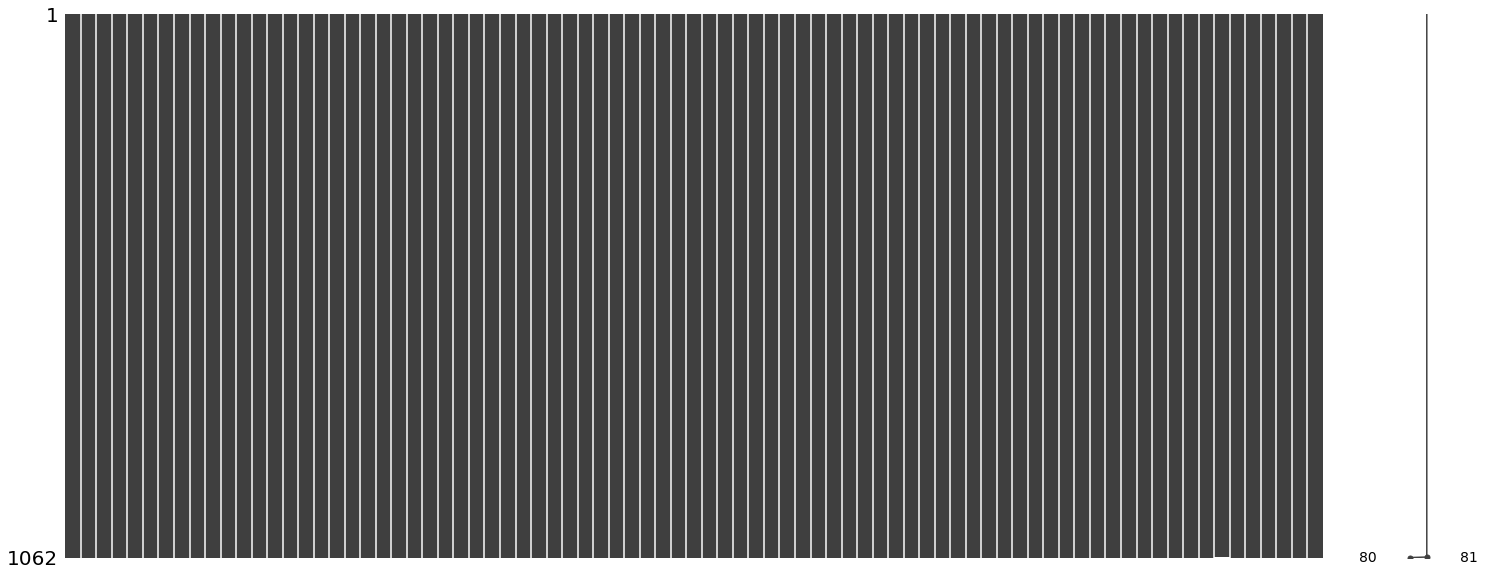

In [18]:
msno.matrix(data)
plt.show()

In [19]:
# data[['profit_rate','adjusted_price']]

In [20]:
# 예측하고자 하는 독립변수에 대한 기술통계
data.profit_rate.describe()

count    1061.000000
mean       -0.197220
std         3.147965
min       -14.196429
25%        -1.973684
50%        -0.396825
75%         1.304348
max        26.807564
Name: profit_rate, dtype: float64

C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


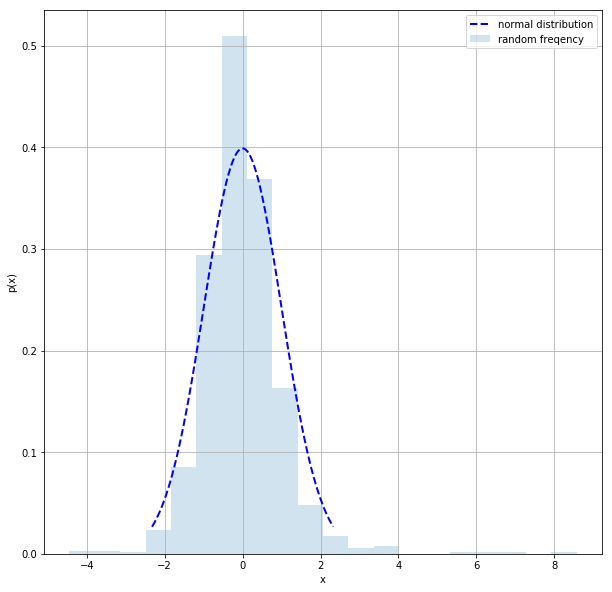

In [21]:
# 다음의 x 범위에서 표준 정규분포를 그릴 예정입니다.
x = np.linspace(stats.norm.ppf(.01), stats.norm.ppf(.99), 100) # x 범위 설정

fig = plt.figure(figsize=(10, 10))     # 플롯은 20 * 20 사이즈로 작성합니다.

# for 루프로 4개의 플롯을 작성하겠습니다.
# 정규분포 형태를 점선으로 표현
plt.plot(x, stats.norm.pdf(x), 'b--', lw=2, label='normal distribution')

# 발생한 난수의 히스토그램 작성
plt.hist((data.profit_rate-data.profit_rate.describe()['mean'])/data.profit_rate.describe()['std'], density=True, histtype='stepfilled', bins=20, alpha=.2, label='random freqency')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.grid(True)
plt.show()

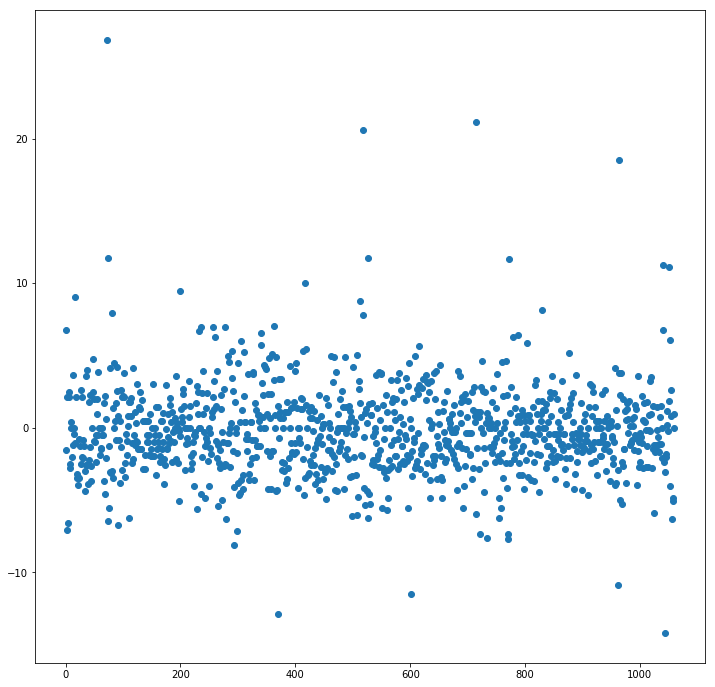

In [22]:
plt.figure(figsize=(12, 12))
x = data.profit_rate.values
plt.scatter(range(len(x)), x)
plt.show()

In [23]:
# 실수형인 종속변수를 범주형으로 바꾸기 위한 작업
def convert_target(x):
    THES = 0.2
    
    if x >= 8 * THES:
        return 2
    elif x >= THES and x < 8 * THES:
        return 1
    elif x >= (-THES) and x < THES:
        return 0
    elif x >= (-8*THES) and x < -THES:
        return -1
    else:
        return -2

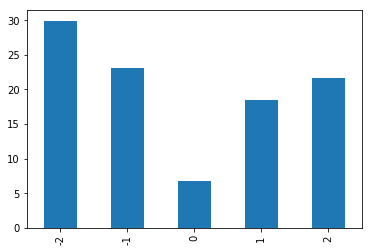

In [24]:
data['target'] = data['profit_rate'].map(convert_target)
target_ratio = data['target'].value_counts() / len(data['target']) * 100
target_ratio.sort_index().plot(kind='bar')
plt.show()

In [25]:
data.head()

,asset(1000),debt(1000),sales(1000),adjusted_price,volumne(mean_5d)(week),volumne(week),profit(1000),term_profit(1000),gross_margin(1000),adjusted_BPS,adjusted_EPS,last_kospi_vol,open_kospi_vol,high_kospi_vol,low_kospi_vol,%change_kospi_vol,last_korean_bond,open_korean_bond,high_korean_bond,low_korean_bond,%change_korean_bond,last_usd_krw,open_usd_krw,high_usd_krw,low_usd_krw,%change_usd_krw,G.TOTAL,Foreign Visitors,Overseas Korean,ASIA,Japan,Taiwan,"Hong Kong, China(including Hong Kong ID.)",Thailand,Philippines,Vietnam,China P. R.,(China),(China-Korean),kospi,kosdaq,last_cny_krw,open_cny_krw,high_cny_krw,low_cny_krw,%change_cny_krw,rsi_14,macd,cci,adx,stoch_slowk,stoch_slowd,willr,momentum,roc,ema20,adosc,obv,event1,event2,event3,event4,event5,event6,event7,event8,event9,event10,event11,event12,event13,event14,event15,event16,profit_rate,rate_rolling_3,rate_rolling_5,rate_rolling_10,rate_rolling_30,rate_rolling_120,rate_rolling_150,target
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-09-01,69121151.0,27844861.0,24673457.0,12300.0,435176.0,324524.0,-1724780.0,-3152446.0,14476286.0,2569.05,-196.19,22.09,20.00,22.13,19.97,11.85,1.941,1.929,1.948,1.927,0.94,1180.05,1183.10,1183.90,1170.40,-0.23,1206764.0,1182360.0,24404.0,1009225.0,157313.0,46353.0,52400.0,15907.0,36605.0,14052.0,591242.0,568322.0,22920.0,672.94,1914.23,1180.05,1183.10,1183.90,1170.40,-0.23,50.429706,-407.587226,69.109360,17.744782,75.576493,76.129647,-27.972028,400.0,3.361345,12022.659557,-247002.369928,192846282.0,-0.063339,-0.029654,-0.211332,-0.140318,-0.172992,-0.010395,-0.124378,-0.185031,0.104443,-0.084999,-0.321603,-0.123142,-0.256058,-0.176076,-0.267665,-0.252694,6.779661,-0.804806,0.482472,1.319753,-0.148795,0.037411,-0.040160,2
2015-09-02,69121151.0,27844861.0,24673457.0,12600.0,361751.0,264220.0,-1724780.0,-3152446.0,14476286.0,2569.05,-196.19,22.40,22.87,23.29,22.06,1.40,1.886,1.905,1.914,1.886,-2.83,1184.08,1180.48,1185.60,1175.73,0.34,1206764.0,1182360.0,24404.0,1009225.0,157313.0,46353.0,52400.0,15907.0,36605.0,14052.0,591242.0,568322.0,22920.0,678.02,1915.22,1184.08,1180.48,1185.60,1175.73,0.34,52.888594,-314.428898,57.554250,16.572993,74.402481,75.685962,-20.979021,1850.0,17.209302,12077.644361,-186224.036269,193110502.0,-0.080275,-0.049060,-0.232193,-0.140692,-0.259603,-0.008626,-0.166093,-0.198593,0.122695,-0.096821,-0.354934,-0.143097,-0.287610,-0.207186,-0.282101,-0.261159,-1.550388,2.395941,1.210601,2.484445,0.172432,0.090401,0.003977,-1
2015-09-03,69121151.0,27844861.0,24673457.0,12700.0,252166.0,243365.0,-1724780.0,-3152446.0,14476286.0,2569.05,-196.19,20.41,21.29,21.34,20.41,-8.88,1.885,1.894,1.897,1.869,-0.05,1191.04,1183.95,1193.75,1182.82,0.59,1206764.0,1182360.0,24404.0,1009225.0,157313.0,46353.0,52400.0,15907.0,36605.0,14052.0,591242.0,568322.0,22920.0,678.25,1915.53,1191.04,1183.95,1193.75,1182.82,0.59,53.712811,-229.881161,83.135894,15.884673,71.024378,73.667784,-18.648019,2200.0,20.952381,12136.916327,-155492.760112,193353867.0,-0.084727,-0.040844,-0.218956,-0.054885,-0.224094,0.024764,-0.163014,-0.188507,0.099021,-0.118170,-0.321818,-0.128389,-0.274569,-0.194641,-0.284143,-0.233092,-7.086614,1.879146,0.562971,2.281559,0.157789,0.042468,0.013747,-2
2015-09-04,69121151.0,27844861.0,24673457.0,11800.0,228455.0,158360.0,-1724780.0,-3152446.0,14476286.0,2569.05,-196.19,22.74,20.15,23.01,20.03,11.42,1.838,1.875,1.889,1.838,-2.49,1201.33,1190.57,1201.76,1187.25,0.86,1206764.0,1182360.0,24404.0,1009225.0,157313.0,46353.0,52400.0,15907.0,36605.0,14052.0,591242.0,568322.0,22920.0,650.45,1886.04,1201.33,1190.57,1201.76,1187.25,0.86,45.925362,-232.815200,41.855251,14.992330,49.595806,65.007555,-33.419023,2200.0,22.916667,12104.829057,-170011.119359,193195507.0,-0.164154,-0.132723,-0.289648,-0.166842,-0.274196,-0.077918,-0.214839,-0.256044,0.000828,-0.167437,-0.386200,-0.213326,-0.329961,-0.263000,-0.325511,-0.307379,2.145923,-0.619114,-0.289835,1.456987,-0.078432,-0.062511,-0.031329,2
2015-09-0

In [26]:
os.chdir(r'G:\공유 드라이브\Boad ADV Stock\화장품')
data.to_csv("data_200_{}.csv".format(company))